# ОИАД. Лабораторная работа №1

Используйте набор данных 'datasets/teen_phone_addiction_dataset.csv'. 

Возьмите столбец $N \% 7 $, где $N$ - номер в списке группы (см. ниже).

## I. 
Рассчитайте характеристики:
1. Среднее
2. Дисперсия
3. Мода
4. Медиана
5. Квантили уровня 0.25, 0.5, 0.75
6. Эксцесс
7. Ассиметрия
8. Интерквартильный размах

Построить графики:
1. Гистограмма
2. Эмпирическая функция распределения

## II. 
Проверить данные на нормальность, используя критерии:
1. Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2. Ассиметрии и эксцесса

Построить Q-Q plot

## III. 
Используя техники обработки данных, постарайтесь привести данные к нормальному распределению.  Например, с помощью:
1. Удаление, усечение выбросов
2. Стандартизация, нормировка
3. Логарифмирование и т.п.

Выполните пункты I и II для обработанных данных

## IV.
Сгруппируйте данные по столбцу 'School_Grade'. 

1. На одном графике постройте гистограммы для каждой группы.
2. Рассчитайте среднее, дисперсию внутри каждой группы

## V.
После каждого пункта сделайте промежуточные выводы:
1. Опишите полученные числовые характеристики и графики
2. Являются ли данные нормальными
3. Эффект от обработки данных (удалось ли привести данные к нормальному виду)
4. Различия распределений внутри разных групп 'School_Grade'




In [54]:
N = 27
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
cols[N % 7]

'Time_on_Education'


## I. 
Рассчитайте характеристики:
1. Среднее
2. Дисперсия
3. Мода
4. Медиана
5. Квантили уровня 0.25, 0.5, 0.75
6. Эксцесс
7. Ассиметрия
8. Интерквартильный размах

Построить графики:
1. Гистограмма
2. Эмпирическая функция распределения

In [57]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


df = pd.read_csv('teen_phone_addiction_dataset.csv')
column = df['Time_on_Education']


mean = column.mean()
variance = column.var()
mode = column.mode()[0]
median = column.median()
quantiles = column.quantile([0.25, 0.5, 0.75])
kurtosis = column.kurtosis()   # эксцесс
skewness = column.skew()       # ассиметрия
iqr = stats.iqr(column)        # интерквартильный размах

print(f"Среднее: {mean}")
print(f"Дисперсия: {variance}")
print(f"Мода: {mode}")
print(f"Медиана: {median}")
print(f"Квантили: {quantiles.to_dict()}")
print(f"Эксцесс: {kurtosis}")
print(f"Ассиметрия: {skewness}")
print(f"Интерквартильный размах: {iqr}")

Среднее: 1.0163333333333333
Дисперсия: 0.42034667111259316
Мода: 0.0
Медиана: 1.0
Квантили: {0.25: 0.5, 0.5: 1.0, 0.75: 1.5}
Эксцесс: -0.39863760176042673
Ассиметрия: 0.34019801954449536
Интерквартильный размах: 1.0


Среднее ≈ 1.016, медиана = 1, мода = 0: распределение в целом сосредоточено около 1, но есть нули, которые немного смещают моду.  
Дисперсия ≈ 0.42, данные умеренно разбросаны  
Интерквартильный размах = 1 :  данные имеют умеренный разброс, около половины значений сосредоточены в диапазоне 0.5-1.5.  
Эксцесс ≈ –0.40 : распределение слегка плоское, хвосты короче, чем у нормального.  
Ассиметрия ≈ 0.34 : небольшая положительная скошенность, правый хвост чуть длиннее (>0), но сильной асимметрии нет.  
Исходные данные не имеют сильно нормального распределения.

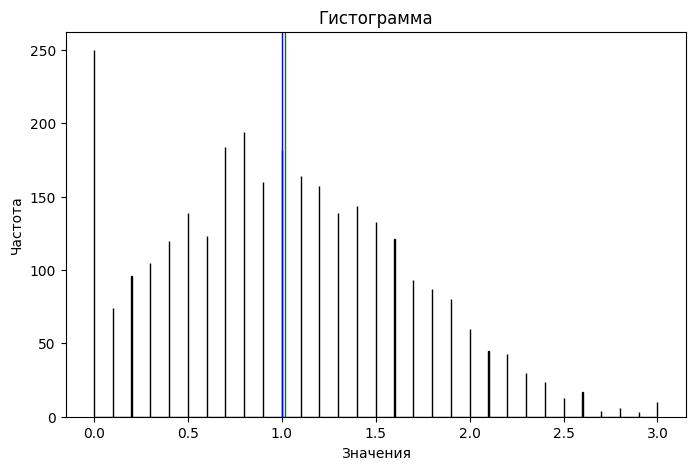

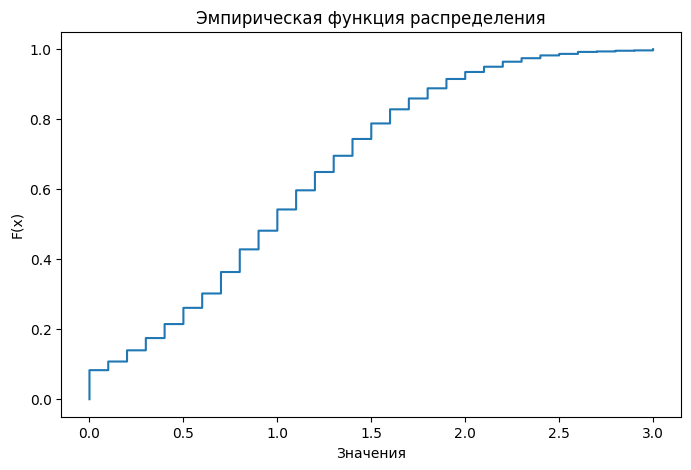

In [58]:
# Графики

# Гистограмма
plt.figure(figsize=(8, 5))
num_of_bins = len(column)
plt.hist(column, bins=num_of_bins, edgecolor='black')
plt.axvline(mean, color='green', linestyle='-', linewidth=1, label=f'Среднее = {mean:.2f}')
plt.axvline(median, color='blue', linestyle='-', linewidth=1, label=f'Медиана = {median:.2f}')
plt.title('Гистограмма')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.show()

# Эмпирическая функция распределения
sorted_col = np.sort(column)
ecdf = np.arange(1, len(sorted_col)+1) / len(sorted_col)

plt.figure(figsize=(8, 5))
plt.step(sorted_col, ecdf, where='post')
plt.title('Эмпирическая функция распределения')
plt.xlabel('Значения')
plt.ylabel('F(x)')
plt.show()


## II. 
Проверить данные на нормальность, используя критерии:
1. Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2. Ассиметрии и эксцесса

Построить Q-Q plot


In [59]:
# Критерий Хи-квадрат - степень расхождения между наблюдаемыми частотами и ожидаемыми частотами, если бы данные были распределены нормально.
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

data = column.dropna().values

mu = np.mean(data)
sigma = np.std(data, ddof=1)

k = 1 + int(np.log2(len(data)))
observed_freq, bin_edges = np.histogram(data, bins=k) # O_i
expected_freq = np.array([                             # E_i
    len(data) * (norm.cdf(bin_edges[i+1], mu, sigma) - norm.cdf(bin_edges[i], mu, sigma))
    for i in range(len(bin_edges)-1)
])

# Статистика Хи-квадрат
chi2_stat = np.sum((observed_freq - expected_freq)**2 / expected_freq)
print(f"Chi-squared statistic: {chi2_stat}")


Chi-squared statistic: 446.23249682312223


In [32]:
from scipy.stats import chi2
p = 2
df = k - p -1
print(f"df: {df}")   # число степеней свободы

alpha = 0.05
df = k - 3
chi2_crit = chi2.ppf(1 - alpha, df)   # критическое значение
print(f"Chi-squared critical value: {chi2_crit}")

p_value = 1 - chi2.cdf(chi2_stat, df)
print(f"p-value: {p_value}")

if chi2_stat > chi2_crit or p_value < alpha:
    print(" Гипотеза о нормальности отвергается")
else:
    print(" Гипотеза о нормальности НЕ отвергается")


df: 9
Chi-squared critical value: 16.918977604620448
p-value: 0.0
 Гипотеза о нормальности отвергается


In [8]:
# Проверка по ассиметрии и эксцессу

print(f"Ассиметрия: {column.skew()}")
print(f"Эксцесс: {column.kurtosis()}")


Ассиметрия: 0.34019801954449536
Эксцесс: -0.39863760176042673


Асимметрия = 0.34, значит распределение слегка тянется вправо (правый хвост чуть длиннее, что и видно на гистограмме).

Эксцесс = –0.40 - распределение чуть более плоское и расплывчатое, чем нормальное, с менее тяжёлыми хвостами.

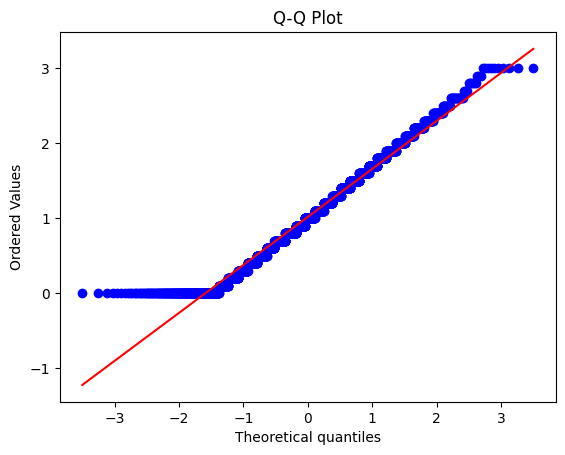

In [9]:
# Q-Q plot

import scipy.stats as stats

stats.probplot(data, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()


В середине точки хорошо ложатся на прямую (распределение близко к нормальному)  

На концах:  
  слева значения выше линии,  
  справа ниже линии.

Это объясняется отрицательным значением эксцесса, распределение более плоское и с более лёгкими хвостами, чем нормальное.

## III. 
Используя техники обработки данных, постарайтесь привести данные к нормальному распределению.  Например, с помощью:
1. Удаление, усечение выбросов
2. Стандартизация, нормировка
3. Логарифмирование и т.п.

Выполните пункты I и II для обработанных данных


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
from scipy.stats import skew, kurtosis, norm, probplot
from sklearn.preprocessing import PowerTransformer
from scipy import stats
from scipy.stats import boxcox

data_path = 'teen_phone_addiction_dataset.csv'
df = pd.read_csv(data_path)
column = df['Time_on_Education']

data = column.dropna().values 

#   Удаление, усечение выбросов
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1
data_no_outliers = data[(data >= Q1 - 1.5*IQR) & (data <= Q3 + 1.5*IQR)]

#  Yeo-Johnson и стандартизация

pt = PowerTransformer(method='yeo-johnson')
data_yeojohnson = pt.fit_transform(data_no_outliers.reshape(-1, 1)).flatten()

# data_log = np.log1p(data_yeojohnson)  #     без логарифмирования
data_log = data_yeojohnson
data_processed = (data_log - np.mean(data_log)) / np.std(data_log)   # преобразует данные так, чтобы среднее было 0, а стандартное отклонение — 1.


# Повторяем пункты 1, 2


processed_series = pd.Series(data_processed)  # новые данные

mean_proc = processed_series.mean()
var_proc = processed_series.var()
mode_proc = processed_series.mode()[0]
median_proc = processed_series.median()
quantiles_proc = processed_series.quantile([0.25, 0.5, 0.75])
kurtosis_proc = processed_series.kurtosis()   # эксцесс
skewness_proc = processed_series.skew()       # ассиметрия
iqr_proc = stats.iqr(processed_series)       # интерквартильный размах

print(f"Среднее: {mean_proc}")
print(f"Дисперсия: {var_proc}")
print(f"Мода: {mode_proc}")
print(f"Медиана: {median_proc}")
print(f"Квантили: {quantiles_proc.to_dict()}")
print(f"Эксцесс: {kurtosis_proc}")
print(f"Ассиметрия: {skewness_proc}")
print(f"Интерквартильный размах: {iqr_proc}")


Среднее: 2.2500519965736505e-17
Дисперсия: 1.0003334444814937
Мода: -1.763803005484723
Медиана: 0.06633735056074343
Квантили: {0.25: -0.7615263104981838, 0.5: 0.06633735056074343, 0.75: 0.7847505045758576}
Эксцесс: -0.6702451730520771
Ассиметрия: -0.03525124009112167
Интерквартильный размах: 1.5462768150740414


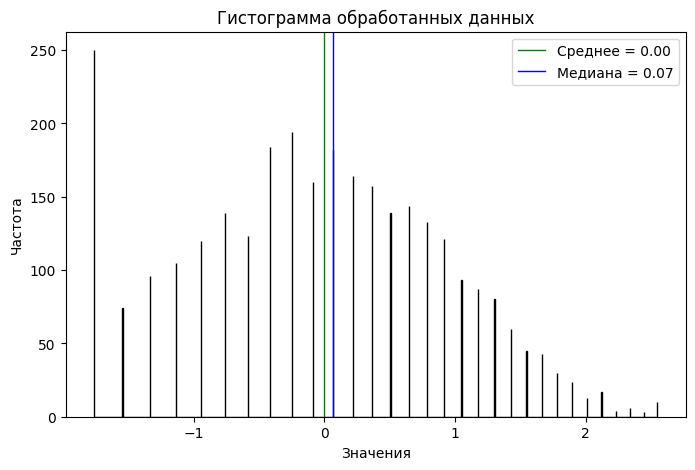

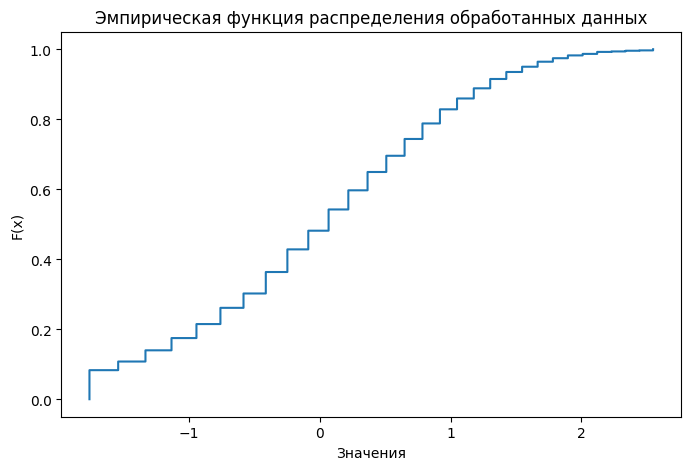

Chi-squared statistic: 414.6660
df: 9
Chi-squared critical value: 16.9190
p-value: 0.0000
 Гипотеза о нормальности отвергается


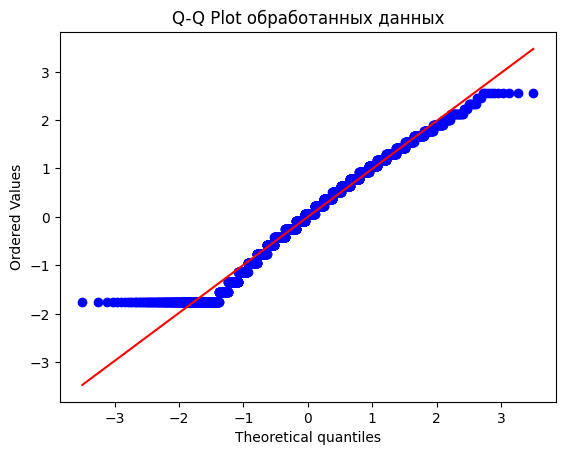

Ассиметрия: -0.0353
Эксцесс: -0.6702


In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2, skew, kurtosis, probplot

# Гистограмма 
plt.figure(figsize=(8, 5))
num_of_bins = len(processed_series)
plt.hist(processed_series, bins=num_of_bins, edgecolor='black')
plt.axvline(mean_proc, color='green', linestyle='-', linewidth=1, label=f'Среднее = {mean_proc:.2f}')
plt.axvline(median_proc, color='blue', linestyle='-', linewidth=1, label=f'Медиана = {median_proc:.2f}')
plt.title('Гистограмма обработанных данных')
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.legend()
plt.show()




# Эмпирическая функция распределения 
sorted_proc = np.sort(processed_series)
ecdf_proc = np.arange(1, len(sorted_proc)+1) / len(sorted_proc)

plt.figure(figsize=(8, 5))
plt.step(sorted_proc, ecdf_proc, where='post')
plt.title('Эмпирическая функция распределения обработанных данных')
plt.xlabel('Значения')
plt.ylabel('F(x)')
plt.show()

#  Критерий Хи-квадрат
data_values = processed_series.dropna().values
mu_proc = np.mean(data_values)
sigma_proc = np.std(data_values, ddof=1)

k_bins = 1 + int(np.log2(len(data_values)))
observed_freq, bin_edges = np.histogram(data_values, bins=k_bins)
expected_freq = np.array([
    len(data_values) * (norm.cdf(bin_edges[i+1], mu_proc, sigma_proc) - norm.cdf(bin_edges[i], mu_proc, sigma_proc))
    for i in range(len(bin_edges)-1)
])

chi2_stat_proc = np.sum((observed_freq - expected_freq)**2 / expected_freq)
print(f"Chi-squared statistic: {chi2_stat_proc:.4f}")

alpha = 0.05
df_proc = k_bins - 3  # степени свободы для нормальности
chi2_crit_proc = chi2.ppf(1 - alpha, df_proc)
p_value_proc = 1 - chi2.cdf(chi2_stat_proc, df_proc)

print(f"df: {df_proc}")
print(f"Chi-squared critical value: {chi2_crit_proc:.4f}")
print(f"p-value: {p_value_proc:.4f}")

if chi2_stat_proc > chi2_crit_proc or p_value_proc < alpha:
    print(" Гипотеза о нормальности отвергается")
else:
    print(" Гипотеза о нормальности НЕ отвергается")

# Q-Q plot
probplot(data_values, dist="norm", plot=plt)
plt.title("Q-Q Plot обработанных данных")
plt.show()

#  Ассиметрия и эксцесс ---
skewness_proc = processed_series.skew()
kurtosis_proc = processed_series.kurtosis()

print(f"Ассиметрия: {skewness_proc:.4f}")
print(f"Эксцесс: {kurtosis_proc:.4f}")

Среднее ≈ 0, дисперсия ≈ 1:  это следствие стандартизации, но форма распределения всё равно далека от нормальной.

Асимметрия ≈ 0 : распределение стало почти симметричным, правая и левая части примерно равны.

Эксцесс ≈ –0.67 : распределение слегка «плоское», хвосты меньше, чем у нормального.

Медиана и квантили приблизились к среднему, что говорит о более симметричном распределении после обработки.

Согласно Q-Q-графику по краям распределение остаётся отклонённым от нормального, поэтому полное приведение к нормальному распределению не удалось.Гистограмма обработанных данных показывает, что распределение стало более симметричным по сравнению с исходным.
Простые методы нормализации (Yeo-Johnson, стандартизация, удаление выбросов) не дали нормального распределения, но обработанные данные стали близки к симметричному распределению

## IV.
Сгруппируйте данные по столбцу 'School_Grade'. 

1. На одном графике постройте гистограммы для каждой группы.
2. Рассчитайте среднее, дисперсию внутри каждой группы


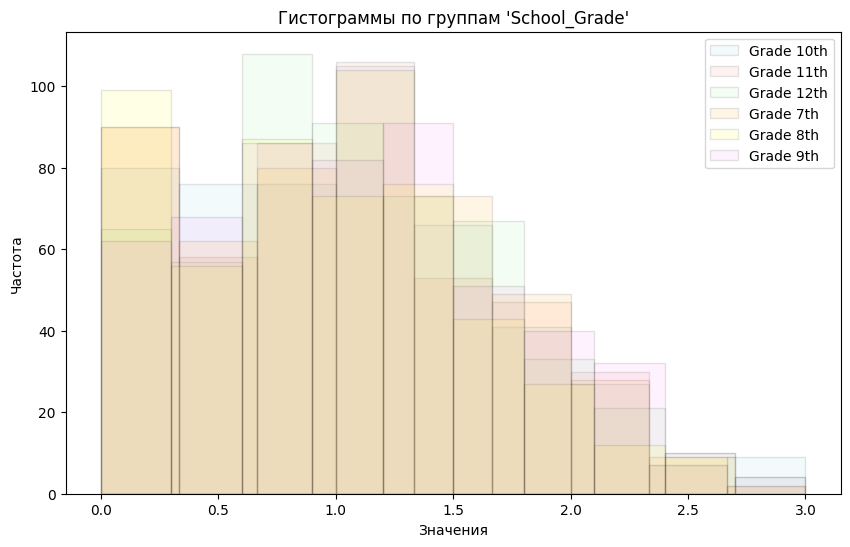

Grade 10th: Среднее = 1.029, Дисперсия = 0.448
Grade 11th: Среднее = 0.992, Дисперсия = 0.409
Grade 12th: Среднее = 1.024, Дисперсия = 0.400
Grade 7th: Среднее = 1.021, Дисперсия = 0.418
Grade 8th: Среднее = 0.975, Дисперсия = 0.423
Grade 9th: Среднее = 1.053, Дисперсия = 0.422


In [52]:

#  Группировка по 'School_Grade'

grouped = df.groupby('School_Grade')


colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'yellow', 'violet']
column = 'Time_on_Education'



plt.figure(figsize=(10,6))

for i, (grade, group) in enumerate(grouped):
    data_group = group[column].dropna()
    num_of_bins = 1 + int(np.log2(len(data_group)))  # правило Райса
    plt.hist(data_group, bins=num_of_bins, alpha=0.1, label=f'Grade {grade}', color=colors[i % len(colors)], edgecolor='black')

plt.title("Гистограммы по группам 'School_Grade'")
plt.xlabel("Значения")
plt.ylabel("Частота")
plt.legend()
plt.show()


# Среднее и дисперсия по группам

for grade, group in grouped:
    data_group = group[column].dropna()
    mean_group = np.mean(data_group)
    var_group = np.var(data_group)
    print(f"Grade {grade}: Среднее = {mean_group:.3f}, Дисперсия = {var_group:.3f}")


Средние значения по классам колеблются в узком диапазоне от 0.975 до 1.053.
Это говорит о том, что среднее время на обучение примерно одинаковое для всех классов.
Нет явных различий между младшими и старшими классами.

Дисперсия по классам также близка друг к другу, от 0.400 до 0.448.
Рассеяние значений сравнимо между группами, нет группы с сильно большей или меньшей изменчивостью.